# __Convolutional Neural Networks: Handwriting Recognition__
---

In this session we will learn how to create and train from scratch a [Convolutional Neural Network (CNN)](https://en.wikipedia.org/wiki/Convolutional_neural_network) that is able to recognize handwritten numbers. This is a typical problem in Handwriting Recognition (HWR) that has many applications in our current society, from being able to transcript text from phones and tablets to quickly scan and digitize old documents. HWR software is also widely used in all kind of administrative procedures, for example when we are asked to fill a from manually writing the letters and numbers in single-letter boxes, so the information in the document can be effectively and quickly gathered.

The HWR is a problem that has been studied for decades. Back in 1974 [Ray Kurzweil](https://en.wikipedia.org/wiki/Ray_Kurzweil) commercialised the first software able to recognize characters in multiple fonts. That pioneer software hardcoded the extraction of manually selected features of the different symbols. But in 1989 [Yann LeCun](https://en.wikipedia.org/wiki/Yann_LeCun) applied the back-propagation algorithm to the recently conceived CNNs, thus creating the [LeNet](https://en.wikipedia.org/wiki/LeNet). This new CNN, trained on the [MNIST](http://yann.lecun.com/exdb/mnist/) database, automated the process of the feature extraction increasing substantially the performance for recognising handwritten digits. The software, with an incredible error rate of only 1%, would ended up being used by the US Postal Service ([here](https://www.youtube.com/watch?v=FwFduRA_L6Q) is a nice demo at the time). In 2011 [a team of computer scientists achieved an astonoshing 99.73% accuracy rate](https://ieeexplore.ieee.org/document/6065487), comparable to human performance. Read [this](https://towardsdatascience.com/https-medium-com-rachelwiles-have-we-solved-the-problem-of-handwriting-recognition-712e279f373b) interesting post from "towards data science" blog for more details.

In this lab, we are going to use the very same old MNIST dataset to recognise handwritten digits, but with nowadays much faster computers. The theoretical concepts we are going to manage here are on the [Deep Learning section](https://moodle.essex.ac.uk/course/view.php?id=15076&section=7) of the Moodle page. Make sure you are familiar with them.


## The Dataset
---
The MNIST dataset is one of the built-in datasets in keras library that we can easily import without having to download and structure the dataset. We can split the content in four variables for easily handling the data throughout our code.

In [1]:
from tensorflow.keras.datasets import mnist
(trainX, trainY), (testX, testY) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


trainX and testX contain the 60000 images for training and 10000 for testing respectively, and trainy and testy contain its corresponding labels, 0-9 integers, in a vector. We can observe the specific format of the variables by checking its .shape attribute.

In [2]:
print('Train: X=%s, y=%s' % (trainX.shape, trainY.shape))
print('Test: X=%s, y=%s' % (testX.shape, testY.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


It is important that we understand that we are operating with images of 28x28 pixels. As anything inside computers, images are a collection of numbers structured in a particular way. Normally each pixel has three values from 0 to 255 for each RGB channel. However, in this case as the images are greyscaled for each pixels we have one value from 0 (black) to 255 (white). For one image, we have a 28x28 tuple, i.e. a vector of 28 vectors where each inner vector represents a row of pixels. We can see the whole object by printing the first element.

In [3]:
print(trainX[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In case we want to see the corresponding image we can directly use the imshow() function from the matplotlib library. Let's have a look to the first nine images of the training dataset `trainX`:

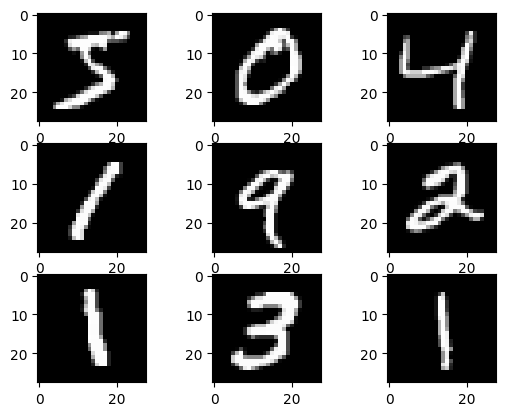

In [4]:
import matplotlib.pyplot as plt
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

And its corresponding labels in the `trainY` variable,

In [5]:
print(trainY[:9])

[5 0 4 1 9 2 1 3 1]


Now let's do the same, plotting the images and printing its corresponding labels, for the first nine numbers in the test dataset.

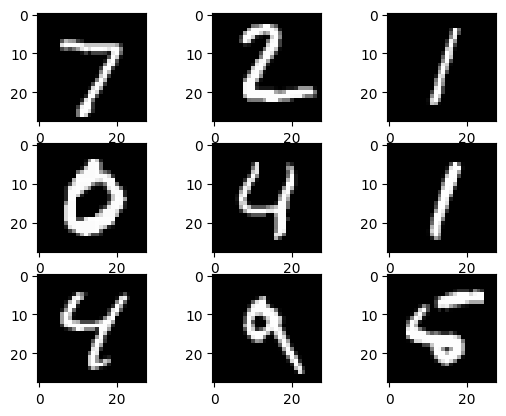

[7 2 1 0 4 1 4 9 5]


In [6]:
# FOR loop to print the first 9 images of the testX dataset
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(testX[i], cmap=plt.get_cmap('gray'))
plt.show()
# print the first 9 lables of the testy variable
print(testY[:9])

## Pre-processing
---

In the MNIST dataset al the numbers are already nicely pre-processed, the numbers are scaled to 28x28 pixels, centred and greyscaled. This of course is very convenient for training our data. However, it still needs some adjustments. The first one is explicitly specifying that the images have only one channel, so the algorithm does not get confused when reading the images. To do so, we need to re-shape our 28x28 tuples and converting it to 28 x 28 x 1, indicating that in each pixel position we have one single value instead of the usual 3 for RGB (28 x 28 x 3). The numbers will be exactly the same, only the format will slightly change. We can use the `.reshape()` method to do that.

In [7]:
# reshape dataset to have a single channel
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

Another typical pre-processing method that must be followed when dealing with images is to scale pixel values. There are three options here:
* __Pixel Normalisation:__ Scale pixel values to the 0-1 range.
* __Pixel Centring:__ Scale pixel values to zero mean, with negative and positive values.
* __Pixel Standarisation:__ Scale pixel values to zero mean and unit variance.

In this case we are going to use pixel normalisation, so we need to rescale the value range from 0-255 to 0-1.

In [8]:
#Normalise pixel values
trainX = trainX / 255.0
testX = testX / 255.0

The target datasets vectors also need some readjustment. The MNIST dataset provides integer numbers from 0 to 9, but here the real machine learning problem type is a __classification problem__ (categorical) rather than a regression problem (numerical). Thus, the error from predicting 3 instead of 2 is not smaller than predicting 8 instead of 2. Failing the prediction counts the same no matter how close those numbers are, we have to treat them like labels. In order to frame the problem correctly we need to convert the numbers in the test variables, from integers to categories. As there are 10 mutually exclusive categories, we will represent this by a vector with 10 position where everything will be zeros except the position that indicates the number, that will be filled with a 1. For example, the number 3 will then be encoded as a vector of zeros except a 1 in the fourth position (the first position is for the 0): `[0 0 0 1 0 0 0 0 0 0]`. Fortunately, keras library provides the `to_categorical()` function that does this job efficiently.

In [9]:
from keras.utils import to_categorical

print("First 9 Train Y values before conversion:")
print(trainY[:9])

# Convert labels from a 0-9 integer to a category (vector)
trainY = to_categorical(trainY)
testY = to_categorical(testY)

print("First 9 Train Y values after conversion:")
print(trainY[:9])

First 9 Train Y values before conversion:
[5 0 4 1 9 2 1 3 1]
First 9 Train Y values after conversion:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


Let's create a convenient function that we can name `load_dataset()` for loading and preprocessing the MNIST data. The function outputs the four variables, `trainX`, `trainY`, `testX` and `testY` with the data treated as explained in this section.

In [10]:
from tensorflow.keras.utils import to_categorical

# Function to load and prepare the dataset
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = mnist.load_data()
    # reshape dataset to have a single channel
    trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
    testX = testX.reshape((testX.shape[0], 28, 28, 1))
    # normalize the pixel value from 0-255 to 0-1
    trainX = trainX.astype('float32') / 255.0
    testX = testX.astype('float32') / 255.0
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

## Defining the architecture
---

When processing data to predict a class, a Convolutional Neural Network has to resolve two different tasks at the same time. The first one (front-end) is to extract the relevant patterns and features from the image, based on a combination of kernel and pooling operations. The second task (back-end) is to use those extracted features to classify the image as one of the possible classes. This will be achieved by the back-end classifier layers, usually a fully connected layers.

Deciding the specific architecture of a neural network is a process that requires a lot of trial and error, and sometimes a little bit of intuition. Many different architectures and training configurations can lead to good results, so there is no one single right answer. In our case we are going to start with a very simple CNN, enough to do the job relatively well. In case we want to expand this model further we can always add more layers and see how the accuracy improves.

For the front-end, we will use only one __2D convolutional layer__ with __16 filters__(features) and a small __kernel size (3,3)__. This will be followed by a __2x2__ __max pooling layer__. The __flatten layer__ will connect the front-end with the back-end, passing 3136 inputs (14 x 14 x 16) to the classifier. The fully connected layer will be a __dense layer__ with __100 nodes__. All neurons will use __ReLU activation functions__ and weights will be initialised uniformally. The last __output layer__ has to contain __10 nodes__, we are predicting 10 different numbers, with __softmax activation__ to determine the category.

For the learning configuration we will use a __stochastic gradient descent__ (SGD) optimizer with a __learning rate of 0.01__ and a __momentum of 0.9__. The __categorical cross-entropy loss__ function will be optimized, usual choice when dealing with classification problems, and we also speciy that we will monitor the classification __accuracy__ metric.

The model described here will be built in a function called `define_model()` that will output the model configuration ready for training.


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import SGD

def define_model_simple():
    # Define the Sequential model class for our case
    model = Sequential()
    # Define the layers of our network
    model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))

    # compile model and training configuration
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

simple_model = define_model_simple()
simple_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2704)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       270,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 271,670 (1.04 MB)

 Trainable params: 271,670 (1.04 MB)

 Non-trainable params: 0 (0.00 B)

<div class="alert alert-block alert-info"><b>Exercise 1:</b><br>Create a function called define_model_advanced() that builds the architecture for a slighlty more advanced CNN corresponding to the following image:<br><br><img src="https://raw.githubusercontent.com/mariogutierrezroig/Teaching-Notebooks/main/Convolutional_Neural_Networks/CNN_architecture_advanced.png" style="width: 600px"></div>

In [12]:
### EXERCISE 1 SOLUTION ###

import torch
import torch.nn as nn
import torch.nn.functional as F

def define_model_advanced():
    class AdvancedCNN(nn.Module):
        def __init__(self):
            super(AdvancedCNN, self).__init__()

            # First convolutional layer: input 1x28x28, output 32x28x28
            self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
            # First max pooling layer: output 32x14x14
            self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

            # Second convolutional layer: output 64x14x14
            self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
            # Second max pooling layer: output 64x7x7
            self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

            # Fully connected layers
            self.fc1 = nn.Linear(64 * 7 * 7, 128)  # Flattened: 3136 = 64*7*7
            self.fc2 = nn.Linear(128, 10)          # 10 output classes for digits 0–9

        def forward(self, x):
            x = F.relu(self.conv1(x))
            x = self.pool1(x)
            x = F.relu(self.conv2(x))
            x = self.pool2(x)
            x = x.view(-1, 64 * 7 * 7)  # Flatten
            x = F.relu(self.fc1(x))
            x = self.fc2(x)
            return x

    return AdvancedCNN()

## Training the model
---
Everything is now ready to train our CNN with the MNIST dataset. Because we have defined the preliminary steps as functions, `load_dataset()` and `define_model()`, we can actually run the training process in very few lines.   The most convenient way to do it is by creating a function named `run()`, that contains all the previous steps before training, then training and evaluating the network and finally plotting some of the results. Including a line for saving the model it is always a good idea. This creates a 4.4MB file that we can load and use for predicting new numbers as explain below.

__Note__: Training a CNN such as the one here with a dataset of 70,000 different instances can take quite a while. Of course this will depend on your hardware setup and whether you are running it in a machine with GPU or CPU only. As a reference, it took my laptop, an intel core i7 with 16GB of RAM, several minutes to complete the training.

In [18]:
# load dataset
trainX, trainY, testX, testY = load_dataset()
# fit model
history = simple_model.fit(trainX, trainY, epochs=12, batch_size=512, validation_data=(testX, testY), verbose=True)
# save the model to file
simple_model.save('handwritten_numbers_classification_model.h5')

Epoch 1/12
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.6587 - loss: 1.1110 - val_accuracy: 0.9211 - val_loss: 0.2673
Epoch 2/12
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9231 - loss: 0.2628 - val_accuracy: 0.9407 - val_loss: 0.2053
Epoch 3/12
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9400 - loss: 0.2058 - val_accuracy: 0.9505 - val_loss: 0.1639
Epoch 4/12
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9516 - loss: 0.1662 - val_accuracy: 0.9601 - val_loss: 0.1388
Epoch 5/12
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9587 - loss: 0.1403 - val_accuracy: 0.9665 - val_loss: 0.1199
Epoch 6/12
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9654 - loss: 0.1205 - val_accuracy: 0.9668 - val_loss: 0.1078
Epoch 7/12
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9717 - loss: 0.1029 - val_accuracy: 0.9694 - val_loss: 0.1017
Epoch 8/12
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9740 - loss: 0.0933 - val_accuracy: 0

The model is already trained, but before using it we might want to check that there is no overfitting. Observing how the accuracy and entropy loss metrics evolve over the training epochs will help us to asses that. Thus we can create a handy function called `diagnostics()` that makes a couple of plots using the information available in the variable `history`, which is the output variable of the training process.

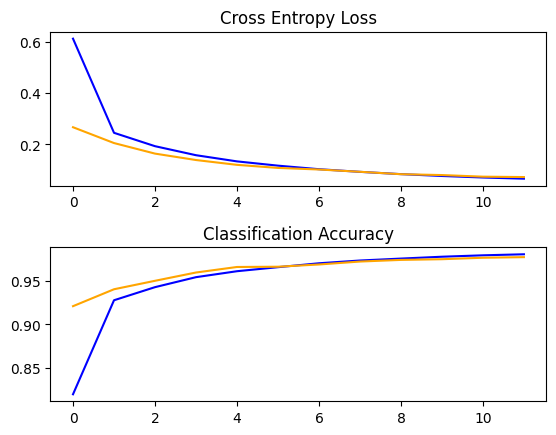

In [19]:
def diagnostics(history, filename=None):

    # Entropy Loss plot
    plt.subplot(211)
    plt.subplots_adjust(hspace=0.4)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')

    # Accuracy plot
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='test')

    # Save plot if filename provided
    if filename is not None:
        plt.savefig(filename)
        plt.close()

diagnostics(history)

We can see in the above image that both curves nicely converge accross time. This means that the results achieved on the training dataset (blue) and the test dataset (orange) are quite similar, which means no signs of overfitting. Another remarkable fact is that the results seem to not be saturated at the end of 12 epochs and some improvement can still be observed. If we let the CNN training for longer we could expect slightly better results.

Finally, we can get the overall accuracy by evaluating the model on the training dataset, whose data points our model has never seen during the training process.

In [20]:
# evaluate model
loss, acc = simple_model.evaluate(testX, testY, verbose=0)
# Print final accuracy
print('Cross Entropy Loss: %.2f' % loss)
print('Accuracy: %.2f%%' % (acc * 100.0))

Cross Entropy Loss: 0.07
Accuracy: 97.79%


The result printed on the screen should show a value close to 98% accuracy. That is quite striking! With a relatively simple convolutional neural network we are getting very high accuracy rates. This shows why CNNs are very powerful when it comes to HWR problems.

<div class="alert alert-block alert-info"><b>Exercise 2:</b><br>Run the advanced CNN designed in the Exercise 1 and compare the results.</div>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/12
118/118 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.7721 - loss: 0.8304 - val_accuracy: 0.9695 - val_loss: 0.1036
Epoch 2/12
118/118 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9717 - loss: 0.0978 - val_accuracy: 0.9793 - val_loss: 0.0667
Epoch 3/12
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9821 - loss: 0.0594 - val_accuracy: 0.9841 - val_loss: 0.0506
Epoch 4/12
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9862 - loss: 0.0466 - val_accuracy: 0.9882 - val_loss: 0.0384
Epoch 5/12
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9893 - loss: 0.0378 - val_accuracy: 0.9870 - val_loss: 0.0392
Epoch 6/12
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9908 - loss: 0.0310 - val_accuracy: 0.9875 - val_loss: 0.0358
Epoch 7/12
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9912 - loss: 0.0289 - val_accuracy: 0.9895 - val_loss: 0.0302
Epoch 8/12
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9927 - loss: 0.0233 - val_accu

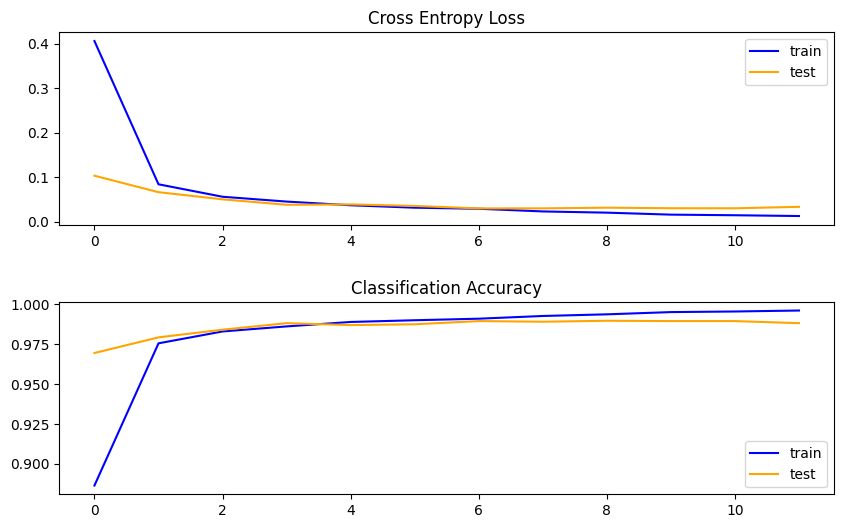

In [13]:
### EXERCISE 2 SOLUTION ###

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load and preprocess dataset
def load_dataset():
    (trainX, trainY), (testX, testY) = mnist.load_data()
    # reshape to [samples][width][height][channels]
    trainX = trainX.reshape((trainX.shape[0], 28, 28, 1)).astype('float32') / 255
    testX = testX.reshape((testX.shape[0], 28, 28, 1)).astype('float32') / 255
    # one-hot encode labels
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

# Define advanced CNN model
def define_model_advanced():
    model = Sequential()
    # Conv Block 1
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2), strides=2))
    # Conv Block 2
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), strides=2))
    # Dense layers
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    # Compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Plot training diagnostics
def diagnostics(history, filename=None):
    plt.figure(figsize=(10, 6))

    # Entropy Loss plot
    plt.subplot(211)
    plt.subplots_adjust(hspace=0.4)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
    plt.legend()

    # Accuracy plot
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='test')
    plt.legend()

    if filename is not None:
        plt.savefig(filename)
        plt.close()
    else:
        plt.show()

# === Run training ===
trainX, trainY, testX, testY = load_dataset()
advanced_model = define_model_advanced()
history = advanced_model.fit(trainX, trainY, epochs=12, batch_size=512, validation_data=(testX, testY), verbose=True)

# Save the model
advanced_model.save('advanced_handwritten_digits_model.h5')

# Show diagnostics
diagnostics(history)


## Looking into the CNN
---

One of the main drawbacks of Neural Networks in general is that we use them as black boxes where we input some data and most of the times we get a good prediction out of it, but the models are so complex and with so many parameters that we do not really understand what is happening inside. In the case of CNNs, it is dificult to grasp what kind of features and patterns they are picking up from the image.

If we want to give it a go, and try to understand what's happening inside the black box, one way is to look at the values of the weights after the neural network has been trained. In particular, if we want to know the values of the 16 different 3x3 kernels in our `simple_model` we can do it using the `get_weights()` function pointing at the selected layer as shown below.

In [14]:
# get wieghts of first convolutional layer
weights, bias = simple_model.layers[0].get_weights()
weights

array([[[[-0.5780241 , -0.22474319,  0.7348914 , -0.20532447,
           0.40800107, -0.663641  , -0.65953934,  0.78585875,
           0.5463582 ,  0.05424541,  0.43452823,  0.6044549 ,
          -0.22250861,  0.69197416, -0.6632606 , -0.2245394 ]],

        [[-0.18460381,  0.02622759, -0.67688346, -0.20420885,
          -0.4787327 ,  0.34942472, -0.43651876,  0.412423  ,
          -0.2913642 ,  0.22698832,  0.00936139, -0.43281287,
          -0.5155224 ,  0.07333356, -0.16458029, -0.149818  ]],

        [[-0.52692413,  0.20259368, -0.70466125, -0.03969765,
           0.6580136 ,  0.0447709 ,  0.42175066, -0.58409774,
           0.42726016, -0.61973774,  0.09610856, -0.45966616,
          -0.623283  , -0.23047906,  0.13929307,  0.06695062]]],


       [[[ 0.23837852,  0.22533357,  0.80057466, -0.00861055,
           0.45651102, -0.7132212 , -0.12536752,  0.7771585 ,
           0.50181425,  0.6208327 ,  0.547879  , -0.17571217,
          -0.6919461 , -0.07640231, -0.70386195, -0.4492412

This bunch of numbers do not say much to us, but we can easily plot them in 3x3 kernel units to try shed more light in it.

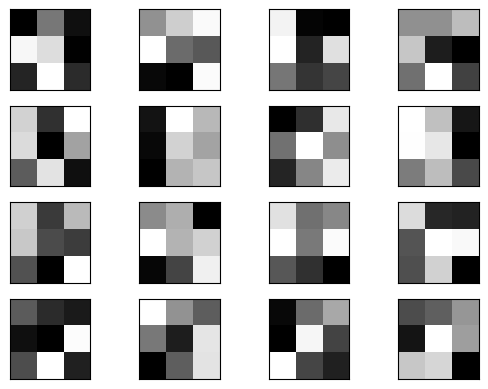

In [15]:
#normalize filter values between  0 and 1 for visualization
f_min, f_max = weights.min(), weights.max()
filters = (weights - f_min) / (f_max - f_min)

# Counter for filters
counter = 1
# Get the number of filters
num_filters = filters.shape[3]

#plotting all the filters
for i in range(num_filters):
    #get the filter values
    filt=filters[:,:,:, i]
    # Display the filters in a 4 x 4 arrangement
    ax= plt.subplot(4, 4, counter )
    ax.set_xticks([])
    ax.set_yticks([])
    plt.imshow(filt[:,:, 0], cmap='gray')
    counter += 1
plt.show()

## Load the model for applications
---
When running the function that builds and trains the model we also export the model in a file named `"handwritten_numbers_classification_model.h5"`. This file contains all the parameters of the CNN resulting from the training process. Therefore, we can use this network for predicting new instances. This section explains how we can make use of this already trained network.

Imagine that we want to classify a new image, like the one you see below.

<img src="https://raw.githubusercontent.com/mariogutierrezroig/Teaching-Notebooks/main/Convolutional_Neural_Networks/sample_image.png" alt="sample_image" width="100">

The first thing we need to do is to pre-process the image in the same way that we have pre-processed the images in the `trainX` and `testX` datasets. We create a function that does this job given a filename (which should correspond to an image stored in the same working directory than the jupyter notebook). Unlike with the MNIST dataset, now we are loading the image from an external source rather than importing it from a package. The functions `load_img()` and `img_to_array()` will be particularly useful here (check its [documentation page](https://keras.io/api/preprocessing/image/)).

In [16]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def load_image(filename):
    # load the image
    img = load_img(filename, color_mode = "grayscale", target_size=(28, 28))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 1 channel
    img = img.reshape(1, 28, 28, 1)
    # prepare pixel data
    img = img.astype('float32')
    # Pixel normalisation; only values between 0 and 1
    img = (img - np.min(img)) / (np.max(img) - np.min(img))
    return img

This function will give us the image in the format we need. Then we only need to load our model, using `load_model()`, and predict the class for that image, the attribute `model.predict_classes()` will work for this particular CNN.

In [21]:
from tensorflow.keras.models import load_model

def new_prediction(filename):
    # load the image
    img = load_image(filename)
    # load model
    model = load_model('handwritten_numbers_classification_model.h5')
    # make the prediction, this outputs the probability for each category
    digit = model.predict(img)
    # print the category using argmax
    print(np.argmax(digit))

new_prediction('sample_image.png')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 480ms/step
7


As you can see, our model should correctly guess it most of the times. __Congratulations! You have successfully train a Convolutional Neural Network that is able to predict handwritten numbers!__

If you really want to test the model by yourselves, you can also use 28 x 28 pixel images with a number drawn in it using Photoshop or equivalent software. Alternatively, you can draw digit numbers in a piece of paper, take a picture, shrink the image to a 28 x 28 picture and convert it to a greyscale where the background is black. Your network should also be able to produce good predictions on your own handwritten numbers. In fact, there are many [online websites](http://www.ccom.ucsd.edu/~cdeotte/programs/MNIST.html) that provide a front-end to draw a number and use a CNN to classify it. This is not far from your own skills right now!

<div class="alert alert-block alert-info"><b>Exercise 3:</b><br>I have written a bunch of numbers on my notebook and taken a picture:<br><br><img src="https://raw.githubusercontent.com/mariogutierrezroig/Teaching-Notebooks/main/Convolutional_Neural_Networks/numbers_in_a_notebook.png" style="width: 400px"><br><br>Can you make an algorithm able to read them?<br><br><i>Hints: The python pillow (PIL) library will be useful here. You will need to <a href="https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.crop">crop</a> the original image multiple times in order to extract each digit individually. Then you will also need to <a href="https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.thumbnail">resize</a> the cropped image, so it has the same 28x28 pixel proportion than the training data, and <a href="https://stackoverflow.com/questions/2498875/how-to-invert-colors-of-image-with-pil-python-imaging">invert its colors</a> before saving it as a separate file. You can then use the load_image() function we created before and run the normal prediction.</i></div>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
Digit 1: Predicted 3 with confidence 0.42
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Digit 2: Predicted 3 with confidence 0.38
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Digit 3: Predicted 3 with confidence 0.59
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Digit 4: Predicted 3 with confidence 0.45
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Digit 5: Predicted 3 with confidence 0.42
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Digit 6: Predicted 3 with confidence 0.49
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Digit 7: Predicted 3 with confidence 0.47


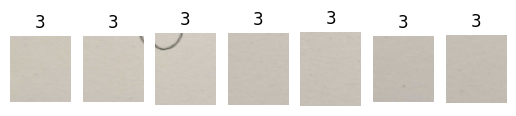

In [29]:
### EXERCISE 3 SOLUTION ###

from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load model (make sure the h5 file is in the same directory)
model = load_model('advanced_handwritten_digits_model.h5')

# Load the full image
img = Image.open('numbers_in_a_notebook.png')

# === Step 1: Define bounding boxes for each digit (crop coordinates) ===
# Format: (left, upper, right, lower) — manually estimated
boxes = [
    (75, 80, 125, 135),   # 0 - slightly expanded from original (80, 90, 120, 130)
    (125, 80, 175, 135),  # 9 - slightly expanded from original (130, 90, 170, 130)
    (175, 75, 225, 135),  # 7 - slightly expanded from original (180, 85, 220, 130)
    (120, 130, 170, 190), # 4 - slightly adjusted from original (125, 140, 165, 185)
    (175, 135, 220, 190), # 1 - slightly adjusted from original (180, 145, 215, 185)
    (75, 180, 125, 235),  # 3 - slightly adjusted from original (80, 190, 120, 230)
    (130, 185, 175, 235), # 2 - slightly adjusted from original (135, 195, 170, 230)
]

# === Step 2: Process each cropped digit ===
def preprocess_digit(crop):
    crop = crop.convert("L")                       # Grayscale
    crop = ImageOps.invert(crop)                   # Invert colors
    crop = crop.resize((28, 28), Image.Resampling.LANCZOS)
    img_array = np.array(crop).astype('float32') / 255
    img_array = img_array.reshape(1, 28, 28, 1)
    return img_array

# === Step 3: Predict digits ===
for i, box in enumerate(boxes):
    cropped = img.crop(box)
    processed = preprocess_digit(cropped)
    prediction = model.predict(processed)
    predicted_digit = np.argmax(prediction)
    confidence = np.max(prediction)
    print(f"Digit {i+1}: Predicted {predicted_digit} with confidence {confidence:.2f}")
    plt.subplot(1, len(boxes), i+1)
    plt.imshow(cropped)
    plt.axis('off')
    plt.title(str(predicted_digit))

plt.show()



<div class="alert alert-block alert-info"><b>Exercise 4: (Optional)</b><br>So far we have used the MNIST dataset only for digits. However, there is and extended version of the dataset called <a href="https://www.nist.gov/itl/products-and-services/emnist-dataset">EMNIST</a> that constains characters as well as numbers. Use this dataset, <a href="https://moodle.essex.ac.uk/course/view.php?id=15076&section=13">available to download in Moodle</a>, to train a CNN and successfully read (with at least 70% success) the following photo from a handwritten text:<br><br> <img src="https://raw.githubusercontent.com/mariogutierrezroig/Teaching-Notebooks/main/Convolutional_Neural_Networks/DATASCIENCEISFUN.png" style="width: 600px"><br><br>Alternatively, you can also try to handwrite something on your own, take a picture, and make the CNN read your own words.<br><br><i>Hints: There are several things you should consider for such an endeavour.
<ol>
  <li>First, is that loading the EMNIST dataset is going to be different than with MNIST since it is not part of the keras built-in datasets. Use the function below to load and pre-process (basically flip and rotate) the EMNIST training and testing datasets, so that you end up with objects of the exact same format than in MNIST. Please, be aware that you need to download the ".zip" file and decompress it in the same directory than the jupyter notebook.</li>
  <li>In the decompressed folder called "emnist-balanced" you will find the CSVs with the train and test datasets, alongside the mapping.txt file, which contains the categories for the characters. Once a class is predicted, use chr(mapping(predicted_class)) in order to obtain the actual predicted character.</li>
  <li>As for the architecture of the CNN, you are very welcome to try your own ideas, but it is always worth to <a href="https://www.kaggle.com/crawford/emnist/code?datasetId=7160&sortBy=voteCount">check architectures that have already proved successful when trained on this dataset</a>.</li>
  <li>Like in the previous exercise, you will also need to <a href="https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.crop">crop</a>, <a href="https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.thumbnail">resize</a>, and <a href="https://stackoverflow.com/questions/2498875/how-to-invert-colors-of-image-with-pil-python-imaging">invert image's colors</a>, before saving each letter in a separated file.</li>
  <li>The cropping points for extracting the letters can be adjusted manually. One useful trick for this it is to resize the whole image to 28-pixel height and select only the points along the x-axis. Make sure that only the letter of interest is visible when you crop from the original image.</li>
</ol></i></div>

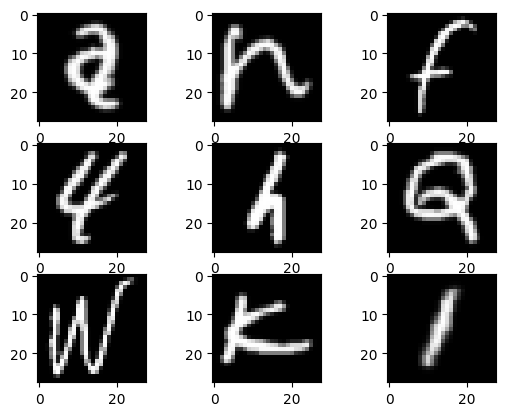

In [34]:
### USE THIS FOR EXERCISE 4 SOLUTION ###

import pandas as pd
import numpy as np

def load_emnist(show_example=True):
    """
    Loads EMNIST dataset, preprocess the data and splits it
    in train_x, train_y, test_x, test_y & mapping.
    """

    train = pd.read_csv("/content/emnist-balanced-train.csv",delimiter = ',')
    test = pd.read_csv("/content/emnist-balanced-test.csv", delimiter = ',')
    mapping = pd.read_csv("/content/emnist-balanced-mapping.txt", delimiter = ' ', index_col=0, header=None)

    # Split x and y
    train_x = train.iloc[:,1:]
    train_y = train.iloc[:,0]
    test_x = test.iloc[:,1:]
    test_y = test.iloc[:,0]

    # Flip and rotate image
    def rotate(image):
        image = image.reshape([28, 28])
        image = np.fliplr(image)
        image = np.rot90(image)
        return image

    train_x = np.asarray(train_x)
    train_x = np.apply_along_axis(rotate, 1, train_x)
    test_x = np.asarray(test_x)
    test_x = np.apply_along_axis(rotate, 1, test_x)

    # Normalise
    train_x = train_x.astype('float32')
    train_x /= 255
    test_x = test_x.astype('float32')
    test_x /= 255

    if show_example:
        for i in range(0,9):
            # define subplot
            plt.subplot(330 + 1 + i)
            # plot raw pixel data
            plt.imshow(train_x[i], cmap=plt.get_cmap('gray'))
        # show the figure
        plt.show()

    train_x = train_x.reshape((train_x.shape[0], 28, 28, 1))
    test_x = test_x.reshape((test_x.shape[0], 28, 28, 1))
    train_y = to_categorical(train_y)
    test_y = to_categorical(test_y)

    return train_x, train_y, test_x, test_y, mapping

# Load the dataset
train_x, train_y, test_x, test_y, mapping = load_emnist(show_example=True)

In [41]:
from PIL import Image, ImageOps
import numpy as np
import matplotlib.pyplot as plt
import os

def segment_and_predict(image_path, model, mapping, debug=False):
    # Load and preprocess image
    original = Image.open(image_path).convert("L")
    image = ImageOps.invert(original)
    image = np.array(image)

    # Binarize image
    threshold = 100
    binary_image = (image > threshold).astype(np.uint8)

    # Sum pixels vertically to detect columns with content
    column_sums = binary_image.sum(axis=0)

    # Identify character regions
    character_boundaries = []
    in_char = False
    start = 0

    for i, col_sum in enumerate(column_sums):
        if col_sum > 0 and not in_char:
            in_char = True
            start = i
        elif col_sum == 0 and in_char:
            in_char = False
            end = i
            if end - start > 2:  # filter out noise
                character_boundaries.append((start, end))

    predictions = []

    for i, (start, end) in enumerate(character_boundaries):
        char_crop = image[:, start:end]  # Crop character horizontally
        char_image = Image.fromarray(char_crop).resize((28, 28))
        char_image = np.array(char_image).astype("float32") / 255.0
        char_image = char_image.reshape(1, 28, 28, 1)

        prediction = model.predict(char_image)
        pred_class = np.argmax(prediction)
        pred_char = chr(mapping.loc[pred_class].values[0])
        predictions.append(pred_char)

        if debug:
            plt.subplot(1, len(character_boundaries), i + 1)
            plt.imshow(char_crop, cmap='gray')
            plt.title(pred_char)
            plt.axis('off')

    if debug:
        plt.tight_layout()
        plt.show()

    return "".join(predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


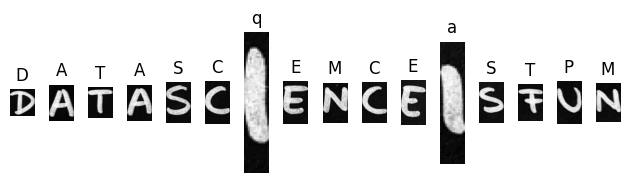

Predicted text: DATASCqEMCEaSTPM


In [43]:
result = segment_and_predict("/content/data_science_is_fun.png", model, mapping, debug=True)
print("Predicted text:", result)


---
<div style="text-align: right ;font-size: small; color: gray"> Notebook by <a href="http://mariogutierrezroig.net">Mario Gutiérrez-Roig</a>, Lecturer in Data Science and Statistics at the University of Essex <a href="http://creativecommons.org/licenses/by-sa/4.0/" rel="license"><img src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" alt="Licencia de Creative Commons" hspace="10" align="right"></a></div>